In [8]:
import matplotlib.pyplot as plt
import numpy as np
import json, glob

In [9]:
model = 'ae'
hierClass = 'Periodic'
outlier = 'none'

In [10]:
lrs = [0.005, 0.001 , 0.0005, 0.0001]
z_dims = [32, 84, 128]
metrics = []
metrics_e = []

for z_dim in z_dims:
    recs = []
    recs_e = []
    for lr in lrs:
        rec = []
        for fold in range(5):
            job_name = './experiments/hyperparames_ae/{}_{}_lr{}_ld{}_fold{}'.format(model, hierClass, lr, z_dim, fold)
            json_file = '{}/metrics_val.json'.format(job_name)
            data = json.load(open(json_file))
            rec.append(data)
        recs.append(np.mean(rec))
        recs_e.append(np.std(rec))
    metrics.append(recs)
    metrics_e.append(recs_e)

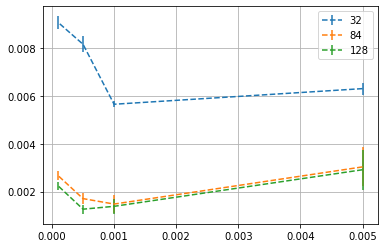

In [11]:
for i in range(len(z_dims)):
    plt.errorbar(lrs, metrics[i], yerr=metrics_e[i], fmt='--', label=z_dims[i])
plt.legend()
plt.grid()
plt.show()